In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = sns.load_dataset("mpg")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.drop(['name'],axis = 1,inplace = True)

In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**DATA  prePROCESSING**

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum().any()

False

In [12]:
df.shape

(392, 8)

__Univariate analysis__

In [13]:
df.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [14]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

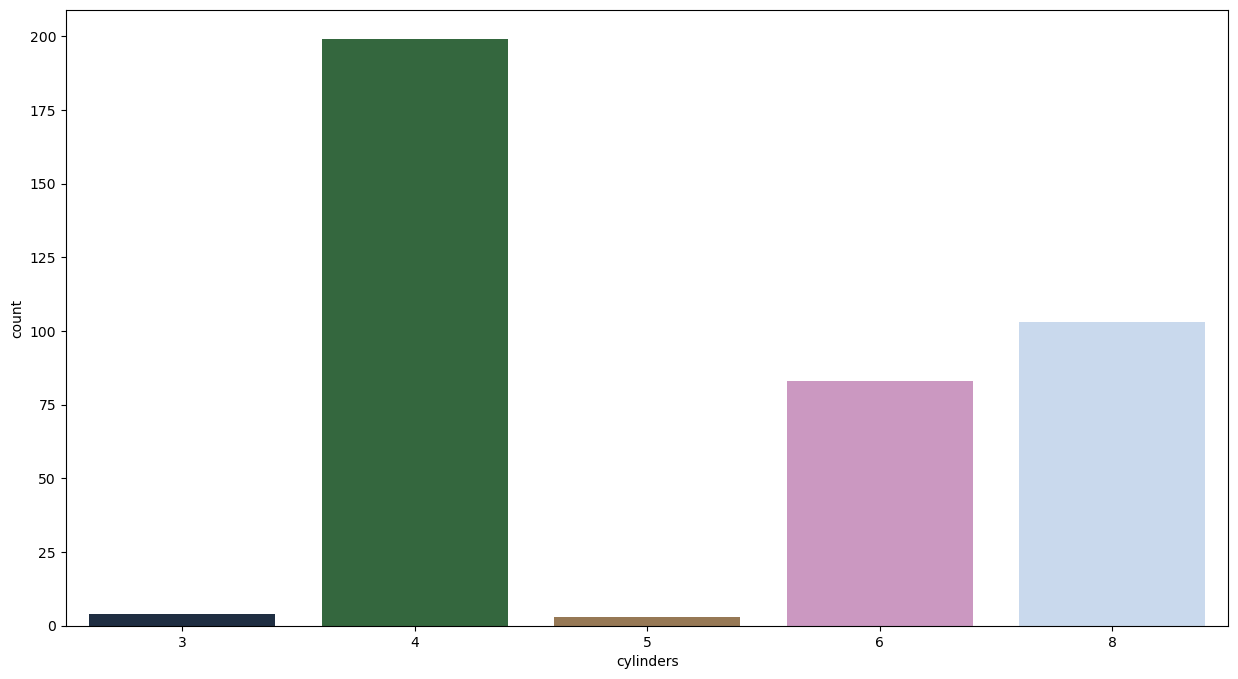

In [15]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='cylinders', palette='cubehelix')
plt.show()

In [16]:
df["model_year"] = (1900 + df.model_year)

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


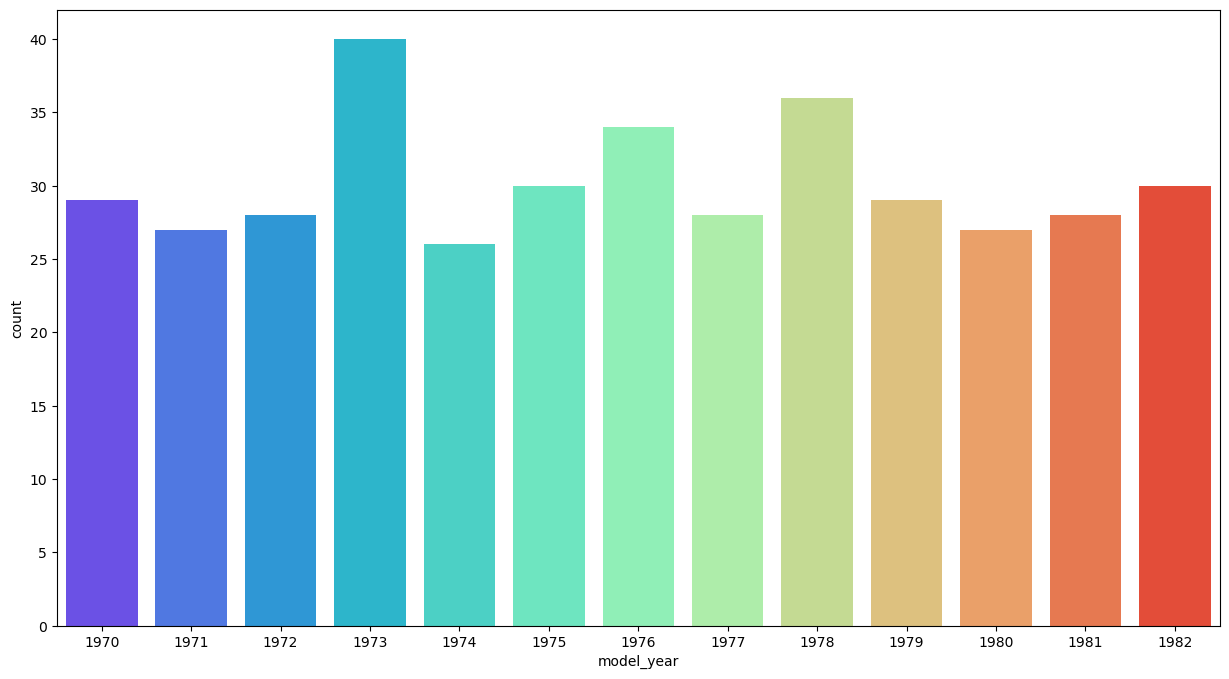

In [18]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='model_year', palette='rainbow')
plt.show()

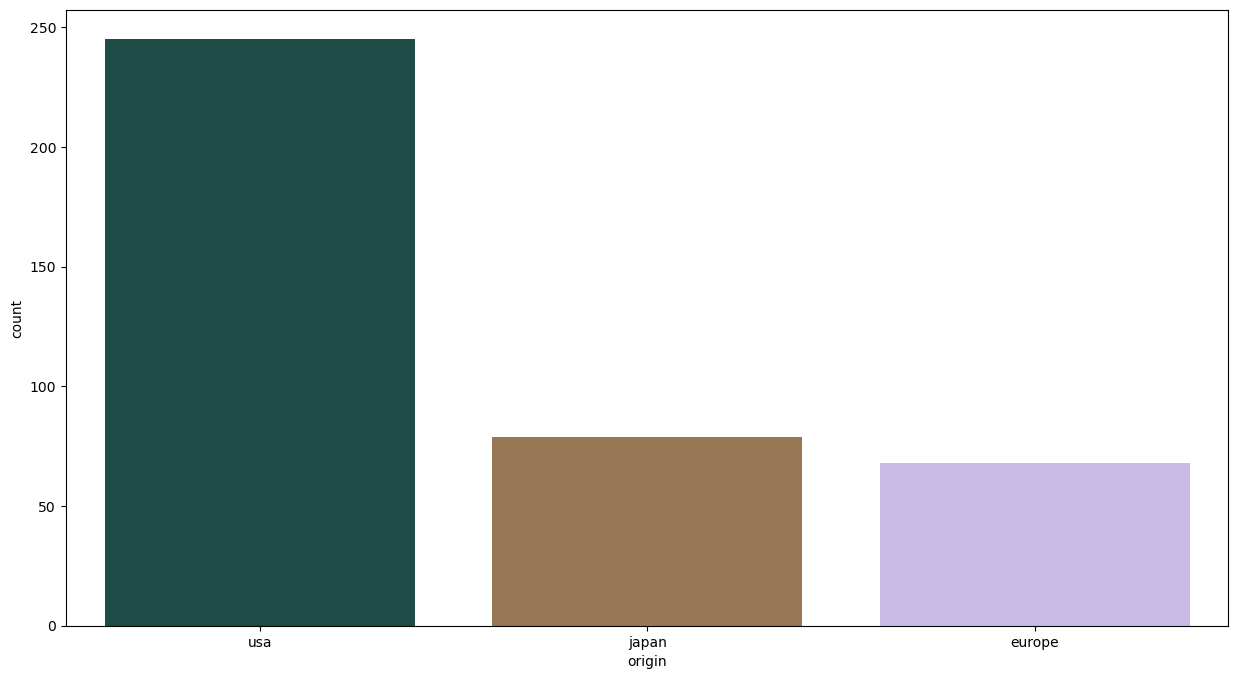

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='origin', palette='cubehelix')
plt.show()

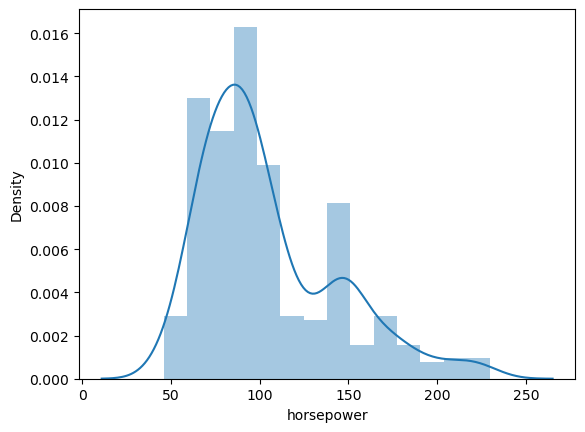

In [20]:
sns.distplot(df["horsepower"])
plt.show()

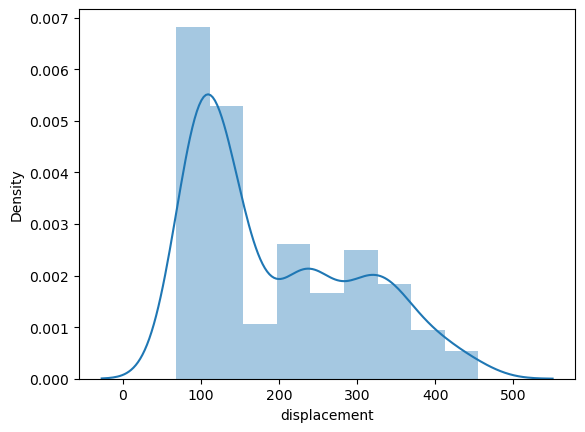

In [21]:
sns.distplot(df["displacement"])
plt.show()

 __Bivariate Analysis__

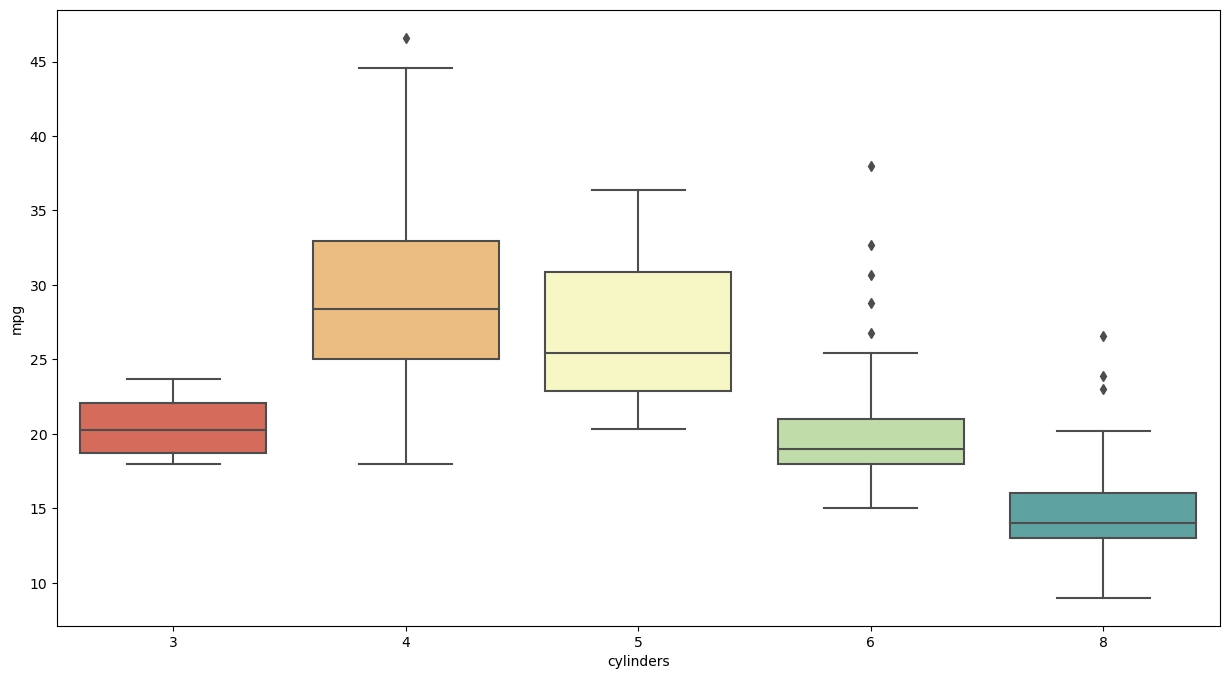

In [22]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "cylinders", y = "mpg", data = df, palette = "Spectral")
plt.show()

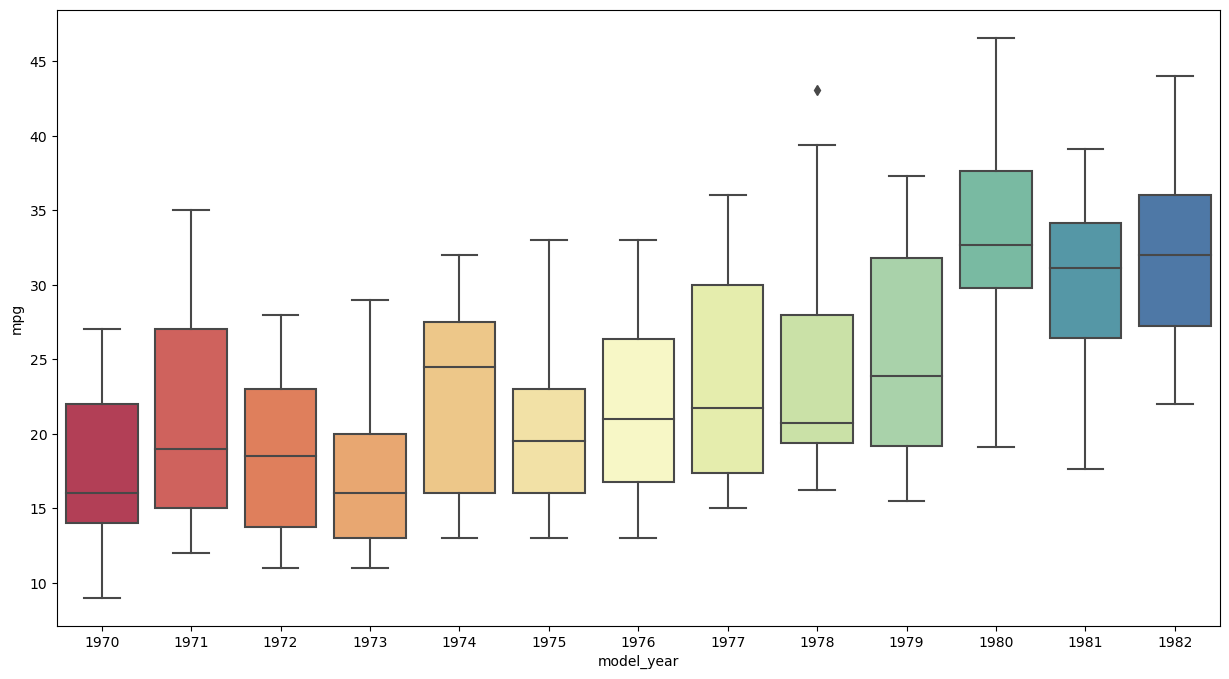

In [23]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "model_year", y = "mpg", data = df, palette = "Spectral")
plt.show()

__Multivariate Analysis__

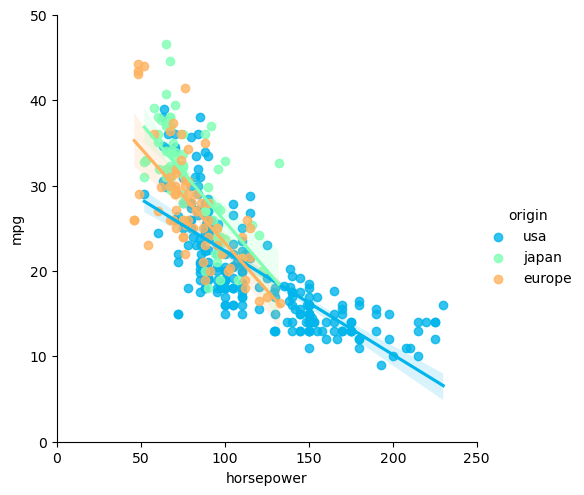

In [24]:
var = sns.lmplot(x = 'horsepower', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
var.set(xlim = (0,250))
var.set(ylim = (0,50))
plt.show()

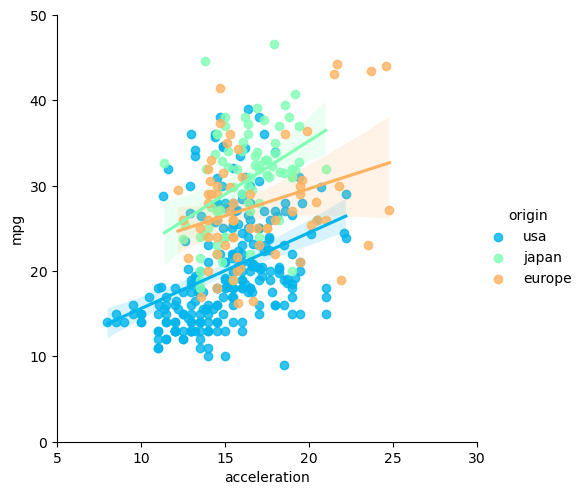

In [25]:
var = sns.lmplot(x = 'acceleration', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
var.set(xlim = (5,30))
var.set(ylim = (0,50))
plt.show()

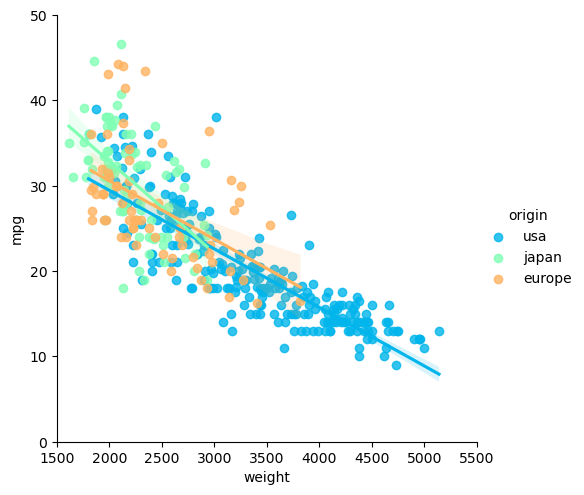

In [26]:
var = sns.lmplot(x = 'weight', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
var.set(xlim = (1500,5500))
var.set(ylim = (0,50))
plt.show()

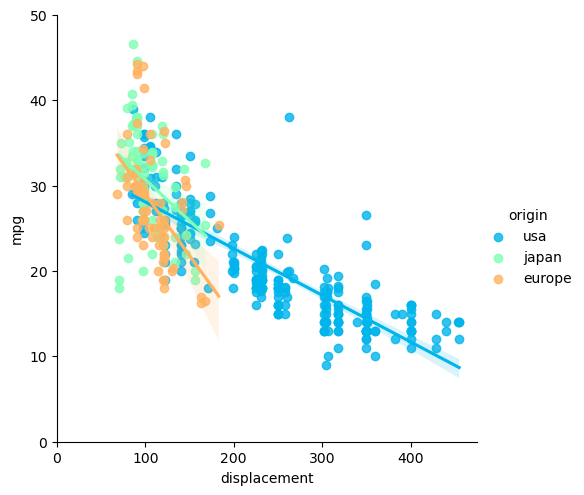

In [27]:
var = sns.lmplot(x = 'displacement', y = 'mpg', hue = 'origin', data = df, palette = 'rainbow')
var.set(xlim = (0,475))
var.set(ylim = (0,50))
plt.show()

Heatmap of correlation matrix

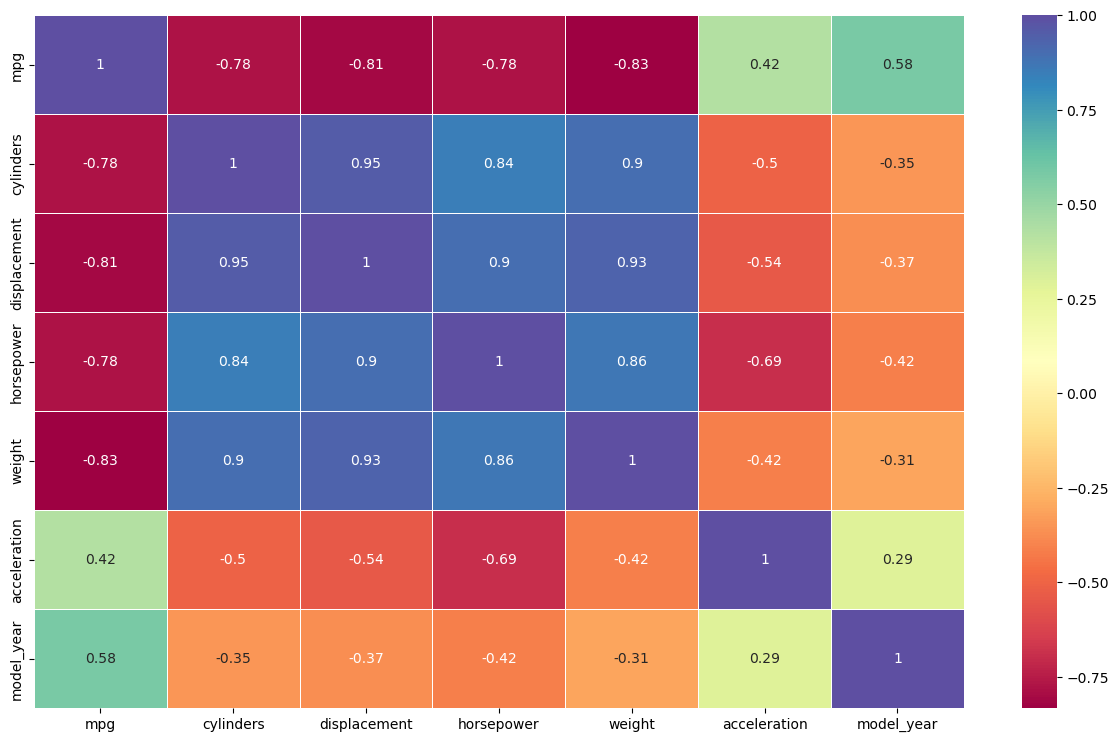

In [28]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(),annot = True,linewidth = 0.5, cmap = 'Spectral')
plt.show()

In [29]:
df.drop(['acceleration','displacement'],axis = 1,inplace = True)

In [30]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [31]:
from datetime import datetime

In [32]:
today = datetime.today()

In [33]:
today

datetime.datetime(2023, 8, 31, 18, 32, 24, 399415)

In [34]:
this_year = today.year
this_year

2023

In [35]:
df['age'] = this_year - df.model_year

In [36]:
df.drop(["model_year"],axis = 1,inplace = True)

In [37]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,53
1,15.0,8,165.0,3693,usa,53
2,18.0,8,150.0,3436,usa,53
3,16.0,8,150.0,3433,usa,53
4,17.0,8,140.0,3449,usa,53


In [38]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [39]:
df = pd.get_dummies(df, drop_first = True)

In [40]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,53,0,1
1,15.0,8,165.0,3693,53,0,1
2,18.0,8,150.0,3436,53,0,1
3,16.0,8,150.0,3433,53,0,1
4,17.0,8,140.0,3449,53,0,1


__Modelling__

In [41]:
X = df.drop(["mpg"],axis = 1)
y = df['mpg']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [44]:
X_train

,cylinders,horsepower,weight,age,origin_japan,origin_usa
260,6,110.0,3620,45,0,1
184,4,92.0,2572,47,0,1
174,6,97.0,2984,48,0,1
64,8,150.0,4135,51,0,1
344,4,64.0,1875,42,0,1
...,...,...,...,...,...,...
72,8,150.0,3892,51,0,1
107,6,100.0,2789,50,0,1
272,4,85.0,2855,45,0,1
352,4,65.0,2380,42,0,1


In [45]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm_model = LinearRegression()

In [48]:
lm_model.fit(X_train,y_train)

LinearRegression()

In [49]:
lm_model.intercept_

79.02451674147221

In [50]:
coef_param = pd.DataFrame(lm_model.coef_, index = X.columns,columns = ['Coefficient'])

coef_param

,Coefficient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


In [51]:
# 1 unit increase in the cylinders variable creates an increase of 0.20 
#in the mpg estimation

In [52]:
y_pred = lm_model.predict(X_test)

In [53]:
my_dict = {"Actual": y_test, "Pred":y_pred}
compare = pd.DataFrame(my_dict)

In [54]:
compare.sample(10)

,Actual,Pred
117,29.0,29.452644
147,24.0,28.484170
91,13.0,11.573409
31,25.0,25.575986
0,18.0,15.016313
134,16.0,17.279368
270,21.1,29.391116
34,16.0,16.116050
167,29.0,29.305004
94,13.0,9.101600


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [56]:
def evaluation_metrics(actual,pred):
    MAE = mean_absolute_error(actual,pred)
    MSE = mean_squared_error(actual,pred)
    RMSE = np.sqrt(mean_squared_error(actual,pred))
    SCORE = r2_score(actual,pred)
    return print("r2_score:",SCORE,"\n","mae:",MAE,"\n","mse:",MSE,"\n","rmse:",RMSE)

In [57]:
evaluation_metrics(y_test,y_pred)

r2_score: 0.7798249880881913 
 mae: 2.518828157615086 
 mse: 11.23786102282303 
 rmse: 3.3522919059686656


In [58]:
# !pip install yellowbrick

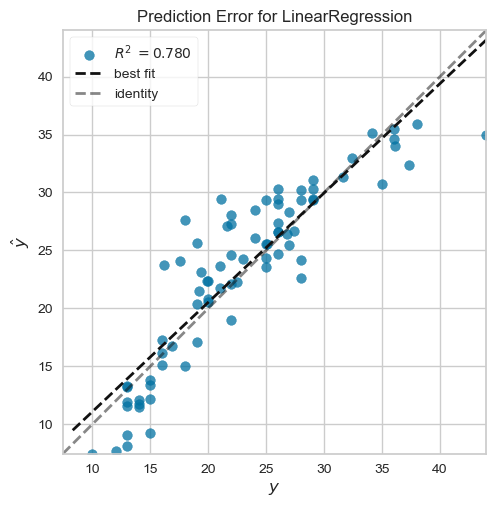

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [59]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lm_model)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

visualizer.show()

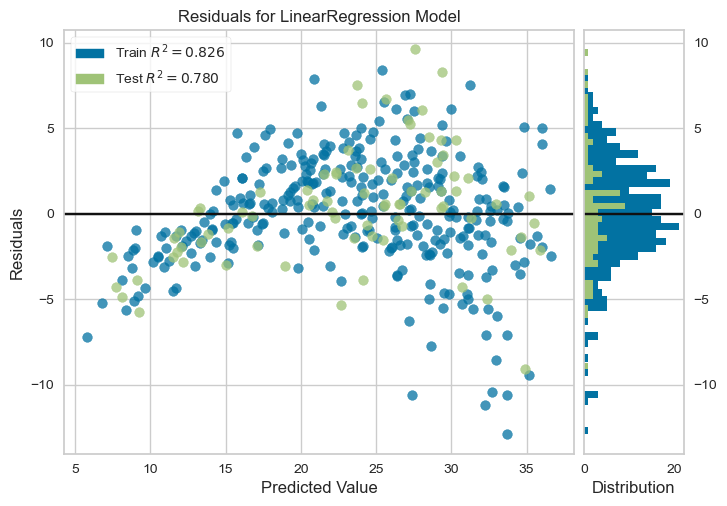

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [60]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm_model)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

visualizer.show()